# (Prosper Loan Dataset)
## by (Abdulrahman Hassanin)

## Preliminary Wrangling

> The dataset contains peer to peer loan information of more than 113k people with 81 features. You can find it <a href='https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000'>here</a> and this <a href='https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0'>link</a> explains the dataset vaibles.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan = pd.read_csv('prosperLoanData.csv')

In [3]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
loan.shape

(113937, 81)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# check for dupliacted rows
sum(loan.duplicated())

0

In [7]:
# check null values
loan.isnull().any(axis=1).sum()

113937

In [8]:
num_missing = loan.isnull().sum()
num_missing = num_missing[num_missing > 0]
num_missing

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

In [9]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The dataset has 113937 records with 81 features most of them are numeric values

### What is/are the main feature(s) of interest in your dataset?

<ul>
    <li><b>BorrowerAPR</b>: The Borrower's Annual Percentage Rate (APR) for the loan.</li>
    <li><b>EstimatedReturn</b>: The estimated return assigned to the listing at the time it was created.</li>
</ul>

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

<ul>
    <li><b>Term</b>: The length of the loan expressed in months.</li>
    <li><b>LoanOriginalAmount</b>: The original amount of loan.</li>
    <li><b>IncomeRange</b>: The income range of the borrower at the time the listing was created.</li>
    <li><b>ProsperScore</b>: A custom risk score built using historical Prosper data.</li>
    <li><b>IncomeRange</b>: The income range of the borrower at the time the listing was created.</li>
    <li><b>LoanStatus</b>: The current status of the loan.</li>
    <li><b>ListingCategory</b>: The category of the listing that the borrower selected when posting their listing.</li>
    <li><b>Investores</b>: The number of investors that funded the loan.</li>
</ul>

## Univariate Exploration

> The Borrower APR is normally distributed around 0.2, however there is an outlier at 0.36

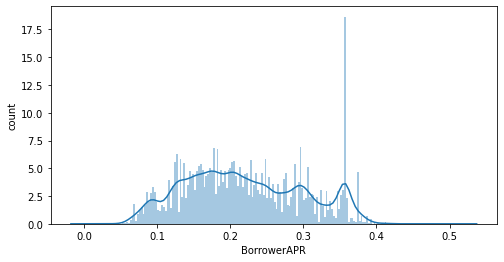

In [10]:
plt.figure(figsize=[8, 4])
sb.distplot(loan.BorrowerAPR, bins = 200)
plt.ylabel('count');

> The length of the loan has three options and the most term is 36 months.

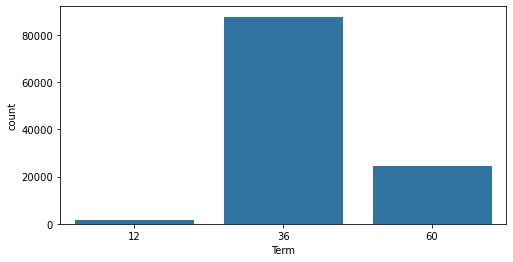

In [11]:
color_base = sb.color_palette()[0]

plt.figure(figsize=[8, 4])
sb.countplot(loan.Term, color=color_base)
plt.ylabel('count');

> The estimated return is normally distributed around approximately 0.8

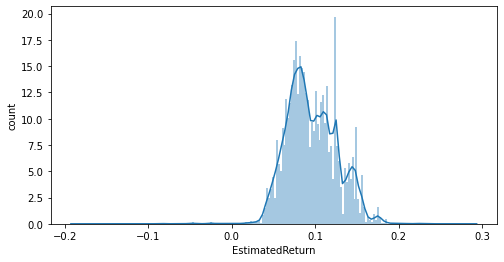

In [12]:
plt.figure(figsize=[8, 4])
sb.distplot(loan.EstimatedReturn, bins=200)
plt.ylabel('count');

> Prosper score is a custom risk score built using historical Prosper data. It is mostly between 4 and 8.

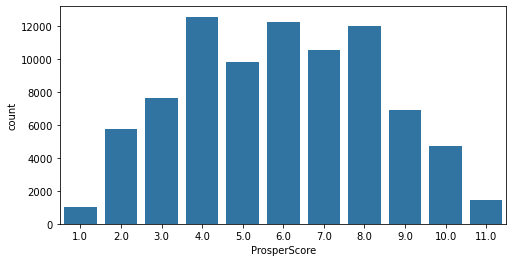

In [13]:
plt.figure(figsize=[8, 4])
sb.countplot(loan.ProsperScore, color=color_base)
plt.ylabel('count');

In [14]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
loan['ProsperRating (Alpha)'] = loan['ProsperRating (Alpha)'].astype(ordered_var)

> The prosper rating is somehow normally distibuted around the C rating.

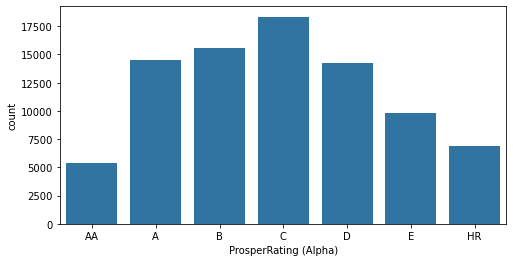

In [15]:
plt.figure(figsize=[8, 4])
sb.countplot(loan['ProsperRating (Alpha)'], color=color_base)
plt.ylabel('count');

> The distribution of the investors vaiable is skewed to the right, so I make a log transformation to scale the distribution.

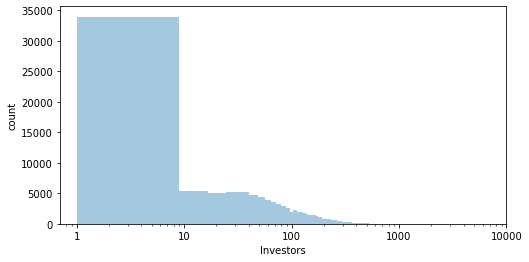

In [16]:
plt.figure(figsize=[8, 4])
sb.distplot(loan.Investors, color=color_base, bins = 150, kde=False)
plt.xscale('log');
ticks = [1, 10, 100, 1000, 10000]
labels = ['{}'.format(val) for val in ticks]
plt.xticks(ticks, labels)
plt.ylabel('count');

> Most of the individuals, their income ranges from 25k to 75k.

In [17]:
ordinal_list = ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                '$75,000-99,999', '$100,000+', 'Not displayed', 'Not employed']
IncomeRange_ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
loan['IncomeRange'] = loan['IncomeRange'].astype(IncomeRange_ordered_var)

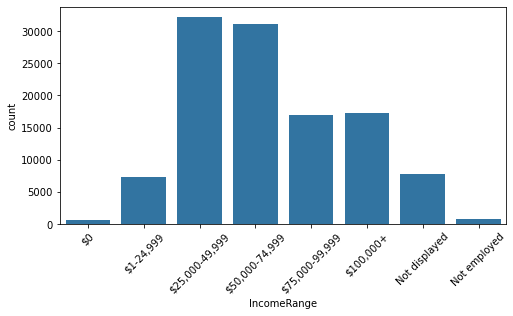

In [18]:
plt.figure(figsize=[8, 4])
sb.countplot(loan.IncomeRange, color=color_base)
plt.ylabel('count');
plt.xticks(rotation=45);

> The below plotting demonstrates the distribution of loan listing categories.

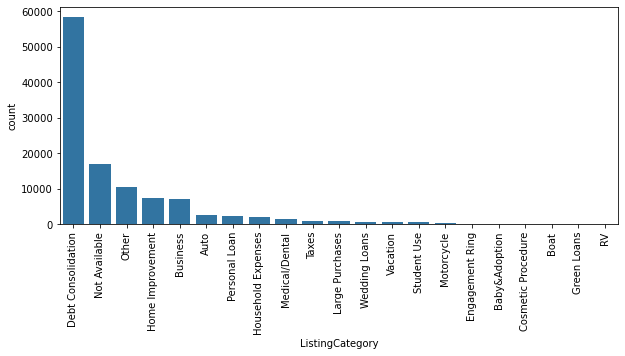

In [19]:
listingCategory = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 
                   4: 'Personal Loan', 5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 
                   10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 
                   14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 
                   19: 'Vacation', 20: 'Wedding Loans'}

loan['ListingCategory'] = loan['ListingCategory (numeric)'].map(listingCategory)

plt.figure(figsize=[10, 4])
sb.countplot(loan['ListingCategory'], color=color_base, order=loan['ListingCategory'].value_counts().index)
plt.ylabel('count');
plt.xticks(rotation=90);

> Loan Original Amount is a right skewed

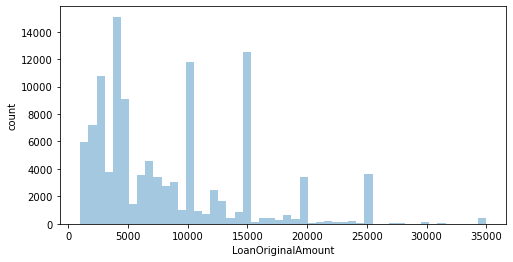

In [20]:
plt.figure(figsize=[8, 4])
sb.distplot(loan.LoanOriginalAmount, kde=False, color=color_base)
plt.ylabel('count');

> Most people are employed

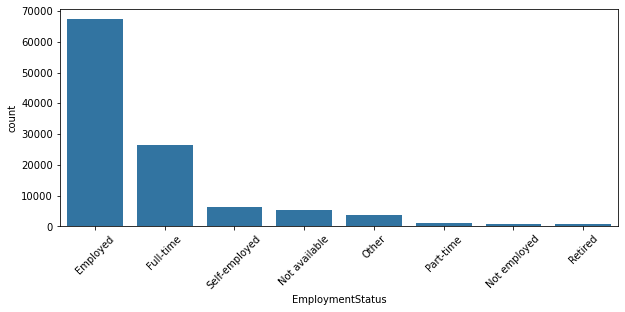

In [21]:
plt.figure(figsize=[10, 4])
sb.countplot(loan['EmploymentStatus'], color=color_base, order = loan['EmploymentStatus'].value_counts().index)
plt.ylabel('count');
plt.xticks(rotation=45);

> The plot shows that more than 50,000 individuals has a loan with Prosper, and quite a number has completed the loan. The number of past due and cancelled are quite low.

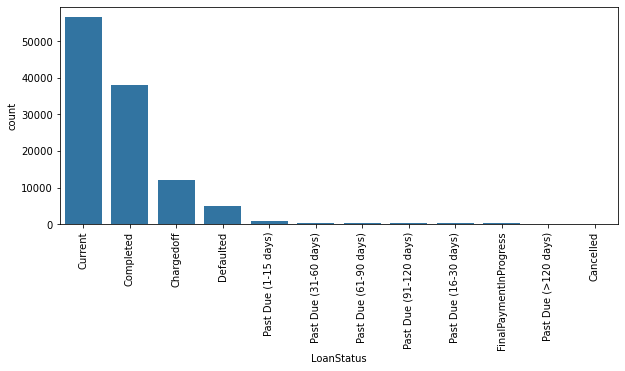

In [22]:
plt.figure(figsize=[10, 4])
sb.countplot(loan['LoanStatus'], color=color_base, order = loan['LoanStatus'].value_counts().index)
plt.ylabel('count');
plt.xticks(rotation=90);

> Monthly Loan Payment is skewed to the right and almost people payment is less than 1k.

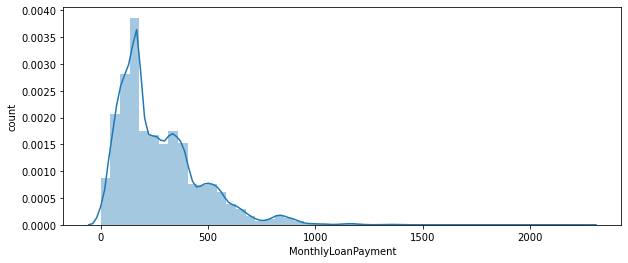

In [23]:
plt.figure(figsize=[10, 4])
sb.distplot(loan['MonthlyLoanPayment'], color=color_base)
plt.ylabel('count');

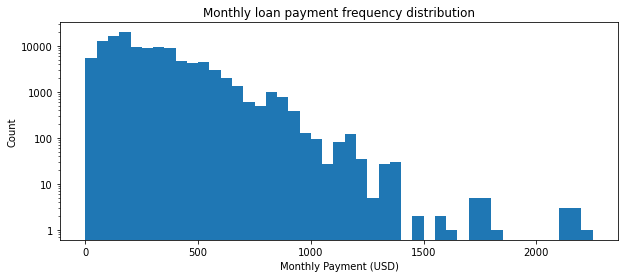

In [24]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

plt.figure(figsize=[10, 4]);
b = np.arange(0, loan['MonthlyLoanPayment'].value_counts().index.max(),50)
plt.hist(data = loan, x = 'MonthlyLoanPayment', bins = b);

ticks = [1, 10, 100, 1000, 10000]
labels = ['{}'.format(val) for val in ticks]


plt.title('Monthly loan payment frequency distribution');
plt.xlabel('Monthly Payment (USD)');
plt.ylabel('Count');
plt.yscale('log');
plt.yticks(ticks, labels);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

><ul>
    ><li>ARP has an outiler at 0.36</li>
    ><li>Monthly Loan Payment is skewed to the right.</li>
></ul>


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I applied log transformation to the Monthly loan payment..

## Bivariate Exploration

Let's start by finding the correlation of the variabels

<ul>
    <li>There is no correlation between variables unless the estimated return and the borrowerAPR</li>
    <li>There is a quite positive correlation between the estimated return and borrower APR</li>
    <li>There is a quite negative correlation between the prosper score and borrower APR</li>
</ul>

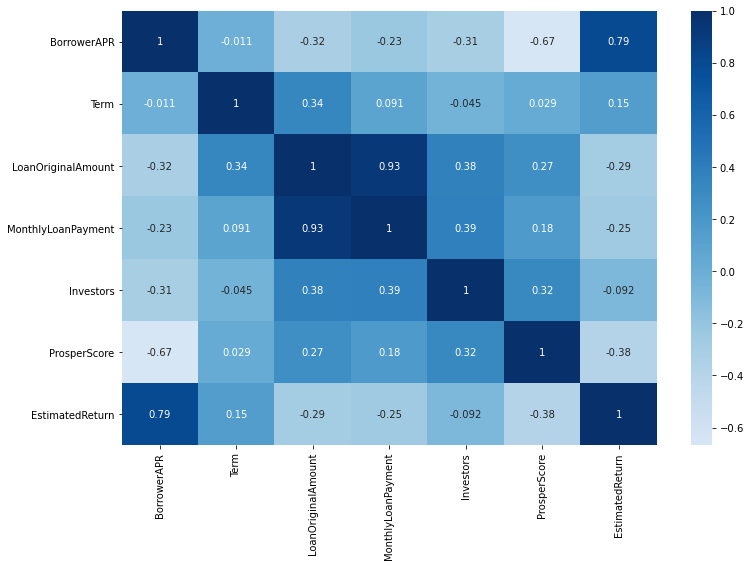

In [25]:
var = ['BorrowerAPR', 'Term', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors', 'ProsperScore', 'EstimatedReturn']
plt.figure(figsize = [12, 8])
ax = sb.heatmap(loan[var].corr(), annot=True, center=0, cmap='Blues')
plt.show()

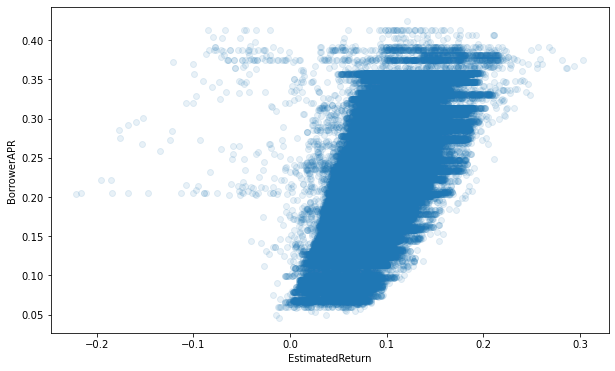

In [26]:
plt.figure(figsize = [10, 6])
sb.regplot(data = loan, x = 'EstimatedReturn', y = 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('EstimatedReturn');
plt.ylabel('BorrowerAPR');

<b>BorrowerAPR</b>
<ul>
    <li>The higher prosper rating cause a higher APR.</li>
    <li>Not employment people has the higher APR median.</li>
    <li>The APR median is almost the same for different duration terms.</li>
</ul>

<b>Estimated Return</b>
<ul>
    <li>the median estimated return decreases with the increaing in the income range.</li>
    <li>The higher prosper rating cause a higher estimed return.</li>
    <li>Long term duration has a high estimated return.</li>
</ul>

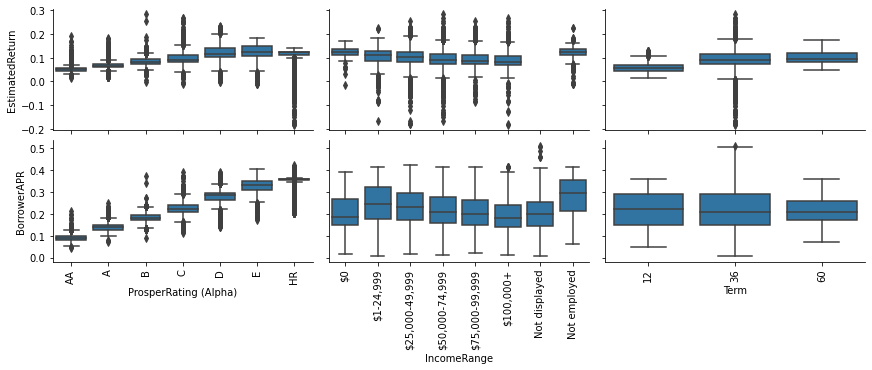

In [27]:
numeric_vars = ['EstimatedReturn', 'BorrowerAPR']
categoric_vars = ['ProsperRating (Alpha)', 'IncomeRange', 'Term']


def boxgrid(x, y, **kwargs):
    sb.boxplot(x, y, color = color_base);
    plt.xticks(rotation=90);

g = sb.PairGrid(data = loan, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 2, aspect =2)
g.map(boxgrid);
plt.show();

> completed loans are mostly at 36 months and quite low are 12 and 60 months. Current loans are mostly 36 months then 60 months and barely are 12 months.

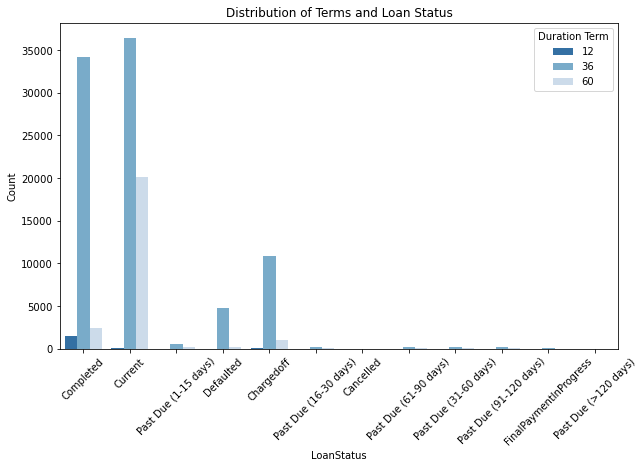

In [28]:
# clustered bar chart
plt.figure(figsize = [10,6])

ax = sb.countplot(data = loan, x = 'LoanStatus', hue = 'Term', palette = 'Blues_r')

ax.legend(title = 'Duration Term')
plt.title('Distribution of Terms and Loan Status')
plt.ylabel('Count');
plt.xticks(rotation=45);

> The higher incomes correlate to a higher credit rating qualifying the borrower for the best (lowest) interest rates.

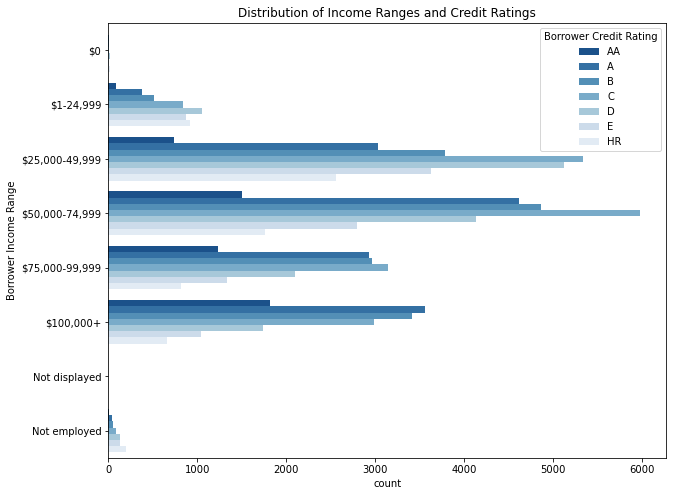

In [29]:
# clustered bar chart
plt.figure(figsize = [10,8])

ax = sb.countplot(data = loan, y = 'IncomeRange', hue = 'ProsperRating (Alpha)',
                   palette = 'Blues_r')

ax.legend(title = 'Borrower Credit Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The heatmap demonstrates that no correlation between variables, unless the Estimated Return and Borrower APR has a quite positive correlation.

> The box plots demonstrates that trend of the median estimated return and APR decreas with the increaing in the income range. Long term duration has a high estimated return. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> completed loans are mostly at 36 months and quite low are 12 and 60 months. Current loans are mostly 36 months then 60 months and barely are 12 months.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

> The estimated return is positively correlated with the borrower APR, however the prosper rating doesn't has an effect on the distribution.

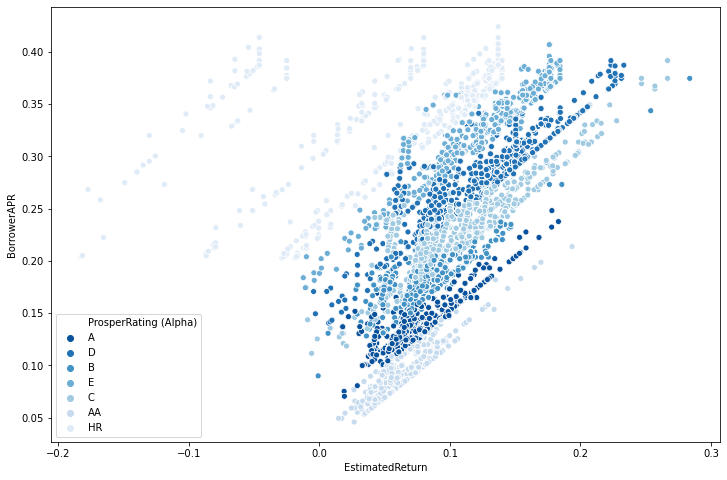

In [30]:
plt.figure(figsize = [12, 8])
sb.scatterplot(data=loan, x='EstimatedReturn', y='BorrowerAPR', hue='ProsperRating (Alpha)', palette='Blues_r');

> The rating from AA to E increases the Borrower APR and reduces the amount term duration. The rating from AA to E increases the Estimated Return and increases the counts of 12 months term duration.

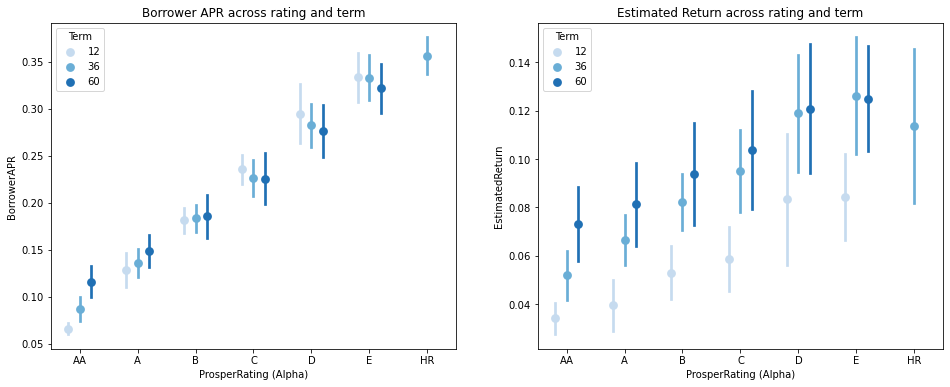

In [31]:
fig = plt.figure(figsize = [16,6])

plt.subplot(1, 2, 1)
ax = sb.pointplot(data = loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term');


plt.subplot(1, 2, 2)
ax = sb.pointplot(data = loan, x = 'ProsperRating (Alpha)', y = 'EstimatedReturn', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Estimated Return across rating and term');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  The rating from AA to E increases the Borrower APR and reduces the amount term duration.
>  The rating from AA to E increases the Estimated Return and increases the counts of 12 months term duration.

### Were there any interesting or surprising interactions between features?

> The surprising that there is no correlation between the numeric variables.